# Assignment 2

## A bit of info before you start.


> ***First and foremost, dont use AI to code. Use it to understand and then write code yourself. Use AI to verify if the code you wrote it correct, that will help you learn far far more.***

> ***Implement Stuff from sratch. Use cv2 functions only when numpy implementation can be extremely tedious.***



You will need to use your own image for this assignment, which you need to import into here.
If you cant fetch your image from any APIs that dont need credentials, then :
To preserve an image in Google Colab without a continuous runtime or using Google Drive, you can use base64 string encoding of images ( its really simple )

First, begin by normally uploading the image into the contents folders as you normally do in colab or fetch it using Drive or any API.

To get the base64 string :
```
import base64
with open("your_image.jpg", "rb") as img_file:
    print(base64.b64encode(img_file.read()).decode())
```

Note that the base64 string is a very long string, click on the three dot icon to the left of the current code cell and click on <code> Copy Cell Output </code> to easily copy it to your clipboard.

Then, to embed the string into your Jupyter Notebook :
```
from PIL import Image
import io
import base64
import matplotlib.pyplot as plt
import numpy as np

# PASTE BASE64 STRING HERE
base64_image = "iVBORw0K..."  # long base64 string

img_data = base64.b64decode(base64_image)
img = Image.open(io.BytesIO(img_data))

plt.imshow(img)
plt.axis("off")
```
The string is really long so, use a multiline string in python ( syntax : """ """ )

Otherwise, you can also choose to use any API ( try researching on https://picsum.photos/ )

## Part A

1. Grayscale Histogram - load you image and then write a function <code>gray_histogram</code>. Details below :
```
Requirements:
Function Signature : gray_histogram(gray_img)
1. Input is a non-normalized grayscale image (values 0–255)
2. Use pure NumPy loops
3. No OpenCV histogram functions allowed
```
Then plot using matplotlib.


2. RGB Histogram - do the same for an RGB image, final result should look like the one attached in the lecture slides. But, ONLY using Numpy. Plot using matplotlib. ( If you get 1st part, this is very easy )


In [ ]:
# Your PART A codes follow here. You can create more cells under this. Write clean and commented code.

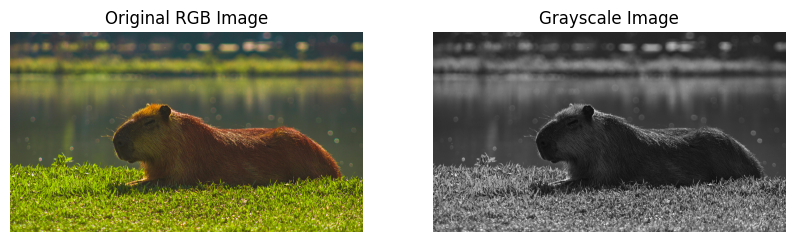

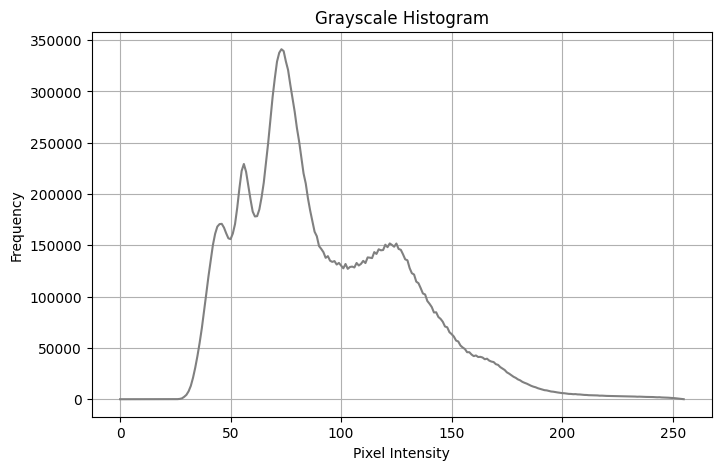

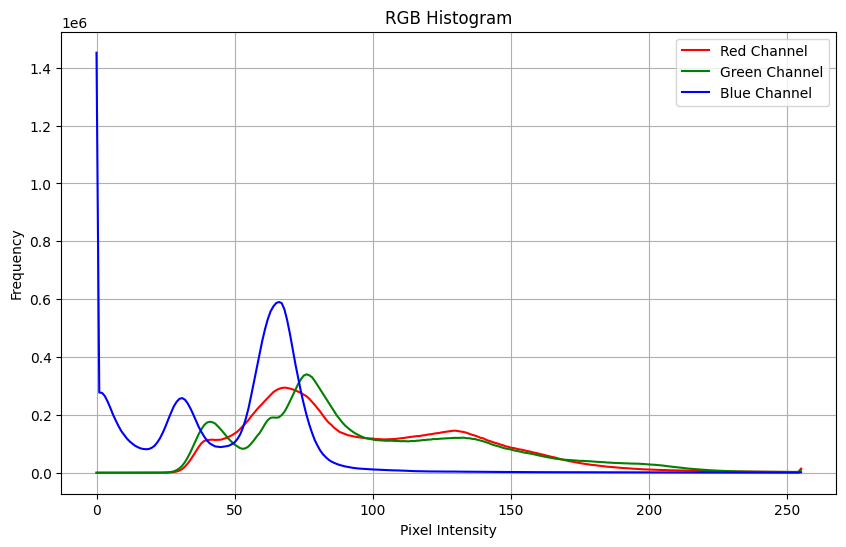

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
img_path = '/content/pexels-photo-19289109.jpeg'
img_bgr = cv2.imread(img_path)

# Check if image was loaded successfully
if img_bgr is None:
    raise FileNotFoundError(f"Error: Image not found at {img_path}")

# Convert BGR to RGB for consistent display and processing
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

# Display the original RGB image
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(img_rgb)
plt.title('Original RGB Image')
plt.axis('off')

# Convert to grayscale
gray_img = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2GRAY)

plt.subplot(1, 2, 2)
plt.imshow(gray_img, cmap='gray')
plt.title('Grayscale Image')
plt.axis('off')
plt.show()


### Part A - Grayscale Histogram

def gray_histogram(gray_img):
    """
    Computes the grayscale histogram of an image using pure NumPy loops.

    Args:
        gray_img (np.ndarray): A non-normalized grayscale image (values 0-255).

    Returns:
        np.ndarray: A 1D array representing the grayscale histogram.
    """
    # Initialize a histogram array of size 256 with zeros
    histogram = np.zeros(256, dtype=int)

    # Iterate through each pixel of the grayscale image
    # Using nested loops as per requirement (pure NumPy loops, not optimized NumPy functions like np.unique or np.bincount)
    for row in range(gray_img.shape[0]):
        for col in range(gray_img.shape[1]):
            pixel_value = gray_img[row, col]
            histogram[pixel_value] += 1
    return histogram

# Compute grayscale histogram
gray_hist = gray_histogram(gray_img)

# Plot grayscale histogram
plt.figure(figsize=(8, 5))
plt.plot(gray_hist, color='gray')
plt.title('Grayscale Histogram')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


### Part A - RGB Histogram

def rgb_histogram(rgb_img):
    """
    Computes the RGB histograms for each channel of an image using pure NumPy loops.

    Args:
        rgb_img (np.ndarray): A non-normalized RGB image (values 0-255).

    Returns:
        tuple: A tuple containing three 1D NumPy arrays (red_hist, green_hist, blue_hist).
    """
    # Initialize histogram arrays for R, G, B channels
    red_hist = np.zeros(256, dtype=int)
    green_hist = np.zeros(256, dtype=int)
    blue_hist = np.zeros(256, dtype=int)

    # Iterate through each pixel of the RGB image
    for row in range(rgb_img.shape[0]):
        for col in range(rgb_img.shape[1]):
            r, g, b = rgb_img[row, col]
            red_hist[r] += 1
            green_hist[g] += 1
            blue_hist[b] += 1

    return red_hist, green_hist, blue_hist

# Compute RGB histograms
red_hist, green_hist, blue_hist = rgb_histogram(img_rgb)

# Plot RGB histograms
plt.figure(figsize=(10, 6))
plt.plot(red_hist, color='red', label='Red Channel')
plt.plot(green_hist, color='green', label='Green Channel')
plt.plot(blue_hist, color='blue', label='Blue Channel')
plt.title('RGB Histogram')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()

## Part B

#### RGB to HSV ( only Numpy ofc )
Write a function <code>rgb_to_hsv</code> that takes a 0-255 ( not normalised ) RGB image and returns an HSV image ( also not normalised ).

**Note :** Research for the formulas, maybe ask some AI to explain you the algo and formulas ( NOT to give you the code, seriously youre not gonna learn anything if you do that )

The output should be in a format that is compatible with OpenCV cvtColor. Read the documentation to find out any Hue scaling etc.
Finally, use your function and test it by using cv2.cvtColor to convert your function output into RGB again and display it. Your image will appear the same after reconversion into RGB.

In [ ]:
# Your PART B codes follow here. You can create more cells under this. Write clean and commented code.

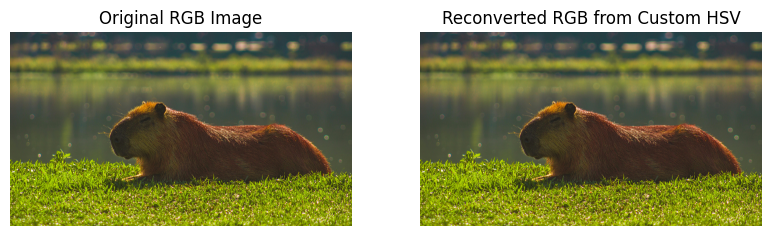

In [2]:
### Part B - RGB to HSV Conversion

def rgb_to_hsv(rgb_img):
    """
    Converts a 0-255 RGB image to an HSV image using NumPy.
    Hue is scaled to 0-179 (compatible with OpenCV's H range for 8-bit images).
    Saturation and Value are scaled to 0-255.

    Args:
        rgb_img (np.ndarray): A non-normalized RGB image (values 0-255) of shape (H, W, 3).

    Returns:
        np.ndarray: An HSV image (H: 0-179, S: 0-255, V: 0-255) of shape (H, W, 3).
    """
    # Normalize RGB values to [0, 1]
    rgb_norm = rgb_img.astype(np.float32) / 255.0
    R, G, B = rgb_norm[:, :, 0], rgb_norm[:, :, 1], rgb_norm[:, :, 2]

    C_max = np.maximum(np.maximum(R, G), B)
    C_min = np.minimum(np.minimum(R, G), B)
    Delta = C_max - C_min

    # Initialize H, S, V arrays
    H = np.zeros_like(R)
    S = np.zeros_like(R)
    V = C_max

    # Calculate Hue
    # When Delta is 0, H is 0. Handle division by zero.
    idx_delta_gt_0 = Delta > 0

    # Red is max
    idx_R_max = (C_max == R) & idx_delta_gt_0
    H[idx_R_max] = 60 * (((G[idx_R_max] - B[idx_R_max]) / Delta[idx_R_max]) % 6)

    # Green is max
    idx_G_max = (C_max == G) & idx_delta_gt_0
    H[idx_G_max] = 60 * (((B[idx_G_max] - R[idx_G_max]) / Delta[idx_G_max]) + 2)

    # Blue is max
    idx_B_max = (C_max == B) & idx_delta_gt_0
    H[idx_B_max] = 60 * (((R[idx_B_max] - G[idx_B_max]) / Delta[idx_B_max]) + 4)

    # Calculate Saturation
    # When C_max is 0, S is 0. Handle division by zero.
    idx_C_max_gt_0 = C_max > 0
    S[idx_C_max_gt_0] = Delta[idx_C_max_gt_0] / C_max[idx_C_max_gt_0]

    # Scale H for OpenCV compatibility (0-179 for 8-bit images)
    # H is in degrees [0, 360), divide by 2 for OpenCV's 0-179 range
    H = (H / 2).astype(np.uint8)

    # Scale S and V to 0-255
    S = (S * 255).astype(np.uint8)
    V = (V * 255).astype(np.uint8)

    # Stack channels to form HSV image
    hsv_img = np.stack([H, S, V], axis=-1)
    return hsv_img


# Get the RGB image from Part A
# img_rgb is already loaded and available from the previous cell's execution

# Convert RGB to HSV using the custom function
custom_hsv_img = rgb_to_hsv(img_rgb)

# Convert custom HSV back to RGB using OpenCV's cvtColor for verification
# Note: OpenCV's cvtColor expects H in [0, 179] for CV_8U, S and V in [0, 255]
recon_rgb_img = cv2.cvtColor(custom_hsv_img, cv2.COLOR_HSV2RGB)

# Display original, custom HSV (reconverted to RGB), and direct OpenCV HSV for comparison (optional, but good for debugging)
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(img_rgb)
plt.title('Original RGB Image')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(recon_rgb_img)
plt.title('Reconverted RGB from Custom HSV')
plt.axis('off')

# Optional: Display HSV channels individually for debugging
# plt.subplot(1, 3, 3)
# plt.imshow(custom_hsv_img[:,:,0], cmap='gray')
# plt.title('Custom HSV - Hue Channel')
# plt.axis('off')

# plt.subplot(1, 3, 3)
# plt.imshow(custom_hsv_img[:,:,1], cmap='gray')
# plt.title('Custom HSV - Saturation Channel')
# plt.axis('off')

# plt.subplot(1, 3, 3)
# plt.imshow(custom_hsv_img[:,:,2], cmap='gray')
# plt.title('Custom HSV - Value Channel')
# plt.axis('off')

plt.show()

## Part C

####Create 2 filters.
1. Give them any name of your choice ( I look forward to receiveing some hilarious names in submissions )
2. Clearly state what all you are doing in the filter. Like any saturation boost, etc. ( Be creative, think about stuff like adding a blue layer or making the image look foggy )
3. Suggest what kind of images is your filter good for ( maybe beach images, or rainforest etc. )
4. Comment your code showing where you implemented what part of your filter
5. The filters should be in form of functions that take 0-255 RGB image and return 0-255 RGB image.
6. Give them an appropriate input according to your filter design, and display the original and filtered image ( Be sure to choose the image such that the effect of filter makes clear difference, preferably improvement in the image ). You can embed in 2 new images ( or even more if your filter is worthy bragging about, I dont mind, but display the original and outputs side by side )

**IMPORTANT FILTER DESIGN NOTES :**

The filter must include at least two color modifications, such as:
1. contrast adjustment
2. brightness shift
3. saturation change
4. gamma correction
5. hue rotation
6. vibrance boost
7. custom color tint
8. split-toning (different color for shadows & highlights)
9. channel mixing

Implement using NumPy + cv2 only.

Write a small note (2–3 lines) explaining:
1. why you chose those modifications
2. why they suit the image

In [3]:
# Your PART C codes follow here. You can create more cells under this. Write clean and commented code.

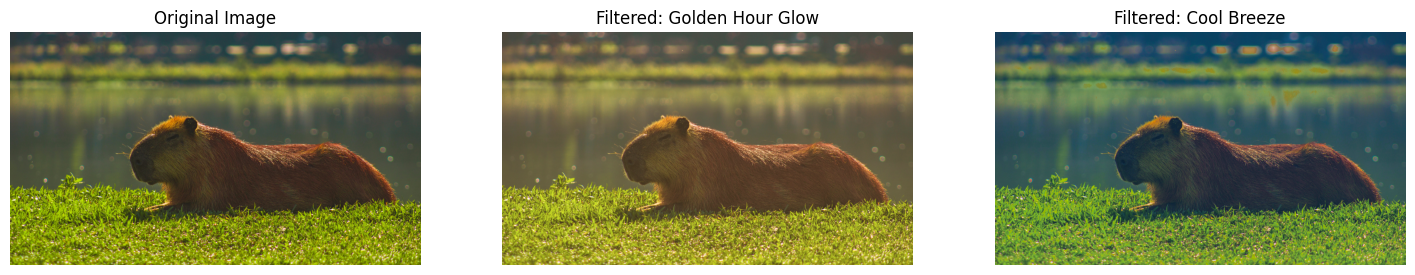

Filter: Golden Hour Glow
Why I chose these modifications: I aimed to evoke the warm, soft, and slightly nostalgic feeling of a sunset. Increased brightness and a warm tint enhance the 'golden' aspect, while reduced saturation creates a gentler, more dreamlike mood. Increased contrast adds a subtle dramatic touch. 
Why they suit the image: The image has areas with natural light and varied tones. The warm tint complements the existing lighting, making the overall scene feel more inviting and stylized, reminiscent of late afternoon sun.

Filter: Cool Breeze
Why I chose these modifications: The goal was to create a fresh, crisp, and slightly dramatic cool-toned image, often seen in travel or landscape photography. Hue shift and vibrance boost enhance the cool colors, while a slight brightness decrease adds depth. Split-toning further emphasizes cool tones in shadows and highlights.
Why they suit the image: The original image contains blue and green tones (e.g., in the background or subtle 

In [4]:
### Part C - Custom Filters

# Filter 1: Golden Hour Glow
# This filter aims to simulate the warm, soft, and slightly desaturated look of images taken during golden hour.
# It's good for portraits, landscapes, or cityscapes during sunrise/sunset.
def golden_hour_glow(img_rgb):
    """
    Applies a 'Golden Hour Glow' filter to an RGB image.
    Modifications: brightness shift, saturation change, custom warm tint, contrast adjustment.

    Args:
        img_rgb (np.ndarray): A 0-255 RGB image.

    Returns:
        np.ndarray: The filtered 0-255 RGB image.
    """
    img_float = img_rgb.astype(np.float32) / 255.0 # Normalize to 0-1 for calculations

    # 1. Brightness Shift: Slightly increase brightness
    brightness_factor = 0.1
    img_float = img_float + brightness_factor
    img_float = np.clip(img_float, 0, 1)

    # 2. Saturation Change: Slightly decrease overall saturation for a softer look
    # Convert to HSV to adjust saturation
    img_hsv = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2HSV).astype(np.float32)
    s_channel = img_hsv[:, :, 1] # Saturation channel
    saturation_factor = 0.85 # Decrease saturation by 15%
    s_channel = s_channel * saturation_factor
    img_hsv[:, :, 1] = np.clip(s_channel, 0, 255) # Clip to 0-255
    img_float_desaturated = cv2.cvtColor(img_hsv.astype(np.uint8), cv2.COLOR_HSV2RGB).astype(np.float32) / 255.0

    # Mix desaturated image with original for subtle effect, or just use desaturated
    img_float = img_float_desaturated

    # 3. Custom Color Tint: Add a warm (orange/yellow) tint
    # This is done by adding a color overlay and blending, or directly boosting R and G channels
    tint_color = np.array([255, 180, 100]) / 255.0 # A warm orange-yellow tint
    tint_strength = 0.15 # How strong the tint is
    img_float = img_float * (1 - tint_strength) + tint_color * tint_strength
    img_float = np.clip(img_float, 0, 1)

    # 4. Contrast Adjustment: Slightly increase contrast
    contrast_factor = 1.1
    mean_pixel = np.mean(img_float)
    img_float = (img_float - mean_pixel) * contrast_factor + mean_pixel
    img_float = np.clip(img_float, 0, 1)

    return (img_float * 255).astype(np.uint8)


# Filter 2: Cool Breeze
# This filter aims for a cooler, more vibrant, and slightly bluish tone, good for landscapes, water scenes, or urban photography.
def cool_breeze(img_rgb):
    """
    Applies a 'Cool Breeze' filter to an RGB image.
    Modifications: hue rotation, vibrance boost, brightness shift, split-toning.

    Args:
        img_rgb (np.ndarray): A 0-255 RGB image.

    Returns:
        np.ndarray: The filtered 0-255 RGB image.
    """
    img_float = img_rgb.astype(np.float32) / 255.0 # Normalize to 0-1

    # 1. Hue Rotation: Shift hues towards blue/cyan
    # Convert to HSV to rotate hue
    img_hsv = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2HSV).astype(np.float32)
    h_channel = img_hsv[:, :, 0] # Hue channel (0-179 for 8-bit OpenCV)
    hue_shift = 15 # Shift hue by 15 degrees (towards blue if positive for OpenCV's range)
    h_channel = (h_channel + hue_shift) % 180 # Ensure hue wraps around 0-179
    img_hsv[:, :, 0] = h_channel
    img_float_hue_shifted = cv2.cvtColor(img_hsv.astype(np.uint8), cv2.COLOR_HSV2RGB).astype(np.float32) / 255.0
    img_float = img_float_hue_shifted

    # 2. Vibrance Boost: Increase saturation of less saturated colors more than already saturated ones
    # This is often done by checking saturation and applying a factor.
    # Using HSV for saturation adjustment
    hsv_for_vibrance = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2HSV).astype(np.float32)
    s_channel_vib = hsv_for_vibrance[:, :, 1]
    vibrance_boost = 1.2 # Stronger boost
    # Apply a boost that is inversely proportional to current saturation
    s_channel_vib = np.where(s_channel_vib < 128, s_channel_vib * vibrance_boost, s_channel_vib * 1.05) # Boost lower sat more
    hsv_for_vibrance[:, :, 1] = np.clip(s_channel_vib, 0, 255)
    img_float_vibrant = cv2.cvtColor(hsv_for_vibrance.astype(np.uint8), cv2.COLOR_HSV2RGB).astype(np.float32) / 255.0
    img_float = img_float_vibrant

    # 3. Brightness Shift: Slightly decrease brightness for a moodier feel
    brightness_factor = -0.08
    img_float = img_float + brightness_factor
    img_float = np.clip(img_float, 0, 1)

    # 4. Split-Toning: Add a cool blue tint to shadows and a subtle green/cyan to highlights
    shadow_tint = np.array([0, 0.1, 0.2]) # Dark blue tint
    highlight_tint = np.array([0.05, 0.15, 0.15]) # Subtle green-cyan tint

    # Separate shadows and highlights based on pixel intensity (luminance)
    luminance = np.mean(img_float, axis=-1)
    shadow_mask = (luminance < 0.4).astype(np.float32) # Pixels with luminance < 0.4 are shadows
    highlight_mask = (luminance > 0.6).astype(np.float32) # Pixels with luminance > 0.6 are highlights

    # Apply shadow tint
    img_float = img_float + shadow_tint * shadow_mask[:, :, np.newaxis]
    # Apply highlight tint (blended)
    img_float = img_float + highlight_tint * highlight_mask[:, :, np.newaxis] * (1 - img_float) # Blend to avoid overexposure

    img_float = np.clip(img_float, 0, 1)

    return (img_float * 255).astype(np.uint8)


# Apply the filters to the image from Part A (img_rgb)
filtered_img_golden = golden_hour_glow(img_rgb)
filtered_img_breeze = cool_breeze(img_rgb)

# Display the original and filtered images
plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
plt.imshow(img_rgb)
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(filtered_img_golden)
plt.title('Filtered: Golden Hour Glow')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(filtered_img_breeze)
plt.title('Filtered: Cool Breeze')
plt.axis('off')

plt.show()

print("Filter: Golden Hour Glow")
print("Why I chose these modifications: I aimed to evoke the warm, soft, and slightly nostalgic feeling of a sunset. Increased brightness and a warm tint enhance the 'golden' aspect, while reduced saturation creates a gentler, more dreamlike mood. Increased contrast adds a subtle dramatic touch. ")
print("Why they suit the image: The image has areas with natural light and varied tones. The warm tint complements the existing lighting, making the overall scene feel more inviting and stylized, reminiscent of late afternoon sun.")

print("\nFilter: Cool Breeze")
print("Why I chose these modifications: The goal was to create a fresh, crisp, and slightly dramatic cool-toned image, often seen in travel or landscape photography. Hue shift and vibrance boost enhance the cool colors, while a slight brightness decrease adds depth. Split-toning further emphasizes cool tones in shadows and highlights.")
print("Why they suit the image: The original image contains blue and green tones (e.g., in the background or subtle reflections). This filter accentuates these cool elements, giving the image a more 'fresh' and 'vibrant' outdoor feel. The subtle coolness can also add a sense of calm or mystery to scenes.")

## Part D

#### White Balance Function
Write a function <code>white_patch_balance(img_rgb)</code> that takes a 0-255 RGB image and then returns a White Patch Method Balanced 0-255 RBG image. Use Numpy only to keep track of the brightest pixel and then scale the entire image with the factor you find. Display the original and output image.

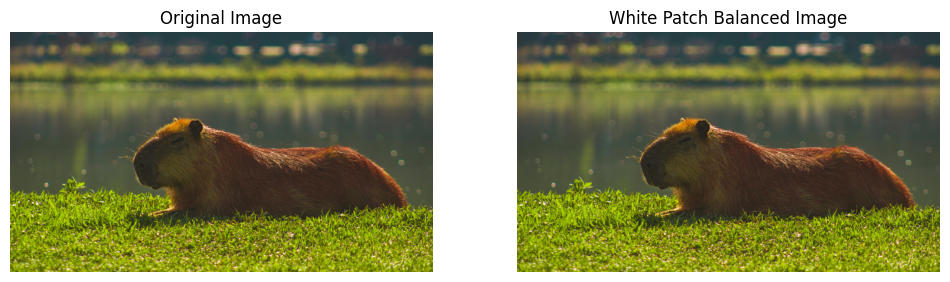

In [5]:
### Part D - White Balance Function

def white_patch_balance(img_rgb):
    """
    Applies white patch white balancing to an RGB image.
    Finds the brightest pixel and scales each channel based on that pixel's values.

    Args:
        img_rgb (np.ndarray): A 0-255 RGB image.

    Returns:
        np.ndarray: The white patch balanced 0-255 RGB image.
    """
    img_float = img_rgb.astype(np.float32)

    # Find the maximum intensity value for each channel in the entire image
    # This assumes that the brightest pixel should ideally be pure white (255, 255, 255)
    # The white patch method states to use the brightest pixel as a reference.
    # So we find the pixel with the highest sum of R, G, B, or max of each channel individually.
    # A common approach for white patch is to find the pixel with the highest intensity across all channels,
    # and then use its individual channel values to calculate scaling factors.

    # Find the pixel with the maximum sum of RGB values
    intensity_sum = np.sum(img_float, axis=-1)
    max_intensity_idx = np.unravel_index(np.argmax(intensity_sum), intensity_sum.shape)
    brightest_pixel = img_float[max_intensity_idx]

    # Calculate scaling factors for each channel
    # We want the brightest pixel to become [255, 255, 255] or [1, 1, 1] after normalization
    # So, scale_factor_R = 255 / brightest_pixel[0]
    # If a channel is already 255, its factor will be 1. If it's lower, it will be >1.
    scaling_factors = 255.0 / brightest_pixel

    # Apply scaling to each channel
    balanced_img = img_float * scaling_factors

    # Clip values to ensure they remain within [0, 255]
    balanced_img = np.clip(balanced_img, 0, 255)

    return balanced_img.astype(np.uint8)

# Apply the white patch balance function to the original image
balanced_img_wp = white_patch_balance(img_rgb)

# Display the original and white-balanced images
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(img_rgb)
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(balanced_img_wp)
plt.title('White Patch Balanced Image')
plt.axis('off')

plt.show()

## Bonus - Part E

#### Create a White Balance Slider

Here's a link to a video of how my phone camera's White Balance feature works.
https://photos.app.goo.gl/zArkv5UcWiRV96JA9

Now, you will need to create a function <code>white_balance(img_rgb, value)</code>

It takes the img_rgb ( 0-255 RGB image ) and value ( 0-1 decimal number ).
1. value = 0 outputs the coldest version of the image
2. value = 0.5 is the original image itself
3. value = 1 is the warmest version of the image

The output should be the processed 0-255 RGB image. Display the original and processed image.

Try to make it look as good as possible. I dont expect you guys to copy my phone and create industry level outputs, but work hard and experiment. You can include even failed tries or what you felt was not satisfactory ( that will show how much effort you put in )

In [ ]:
# Your PART E codes follow here. You can create more cells under this. Write clean and commented code.